In [1]:
# import library...
# ...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## ĐỀ BÀI

Hai bộ dữ liệu `gmp-continents.csv` và `gmp-countries.csv` chứa thông tin về các dân số quốc gia và khu vực qua các năm khác nhau

### Câu 1: (1 điểm)

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [3]:
df_continents = pd.read_csv('gmp-continents.csv')
df_countries = pd.read_csv('gmp-countries.csv')

In [4]:
df_continents.shape

(4, 223)

In [5]:
df_countries.shape

(197, 223)

### Câu 2 (2 điểm)

a, (1 điểm) Liệt kê top 5 nước có dân số cao nhất năm 2020

b, (1 điểm) Vẽ đồ thị pie-chart để hiển thị tỷ lệ dân số giữa các châu lục năm 2020

In [6]:
# Câu a: Liệt kê top 5 nước có dân số cao nhất năm 2020
df_countries.sort_values(by='2020', ascending=False).head(5)

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
35,chn,China,330000000,331538997,333085172,334638557,336199187,337767094,339342314,340924881,...,1376497633,1384206408,1391883335,1399453966,1406847868,1414049353,1421021794,1427647789,1433783692,1439323774
77,ind,India,200733034,201128850,201525446,201922822,202320984,202719931,203119662,203520184,...,1250287939,1265780243,1280842119,1295600768,1310152392,1324517250,1338676779,1352642283,1366417756,1380004385
187,usa,United States,6000000,6113782,6229723,6347862,6468241,6590903,6715891,6843249,...,311584051,314043885,316400539,318673422,320878312,323015992,325084758,327096263,329064917,331002647
78,idn,Indonesia,16108545,16150710,16192985,16235371,16277868,16320476,16363196,16406028,...,245115988,248451714,251805314,255128076,258383257,261556386,264650969,267670549,270625567,273523621
132,pak,Pakistan,13119841,13145712,13171633,13197606,13223629,13249704,13275830,13302008,...,183340168,187280125,191260799,195305012,199426953,203631356,207906210,212228288,216565317,220892331


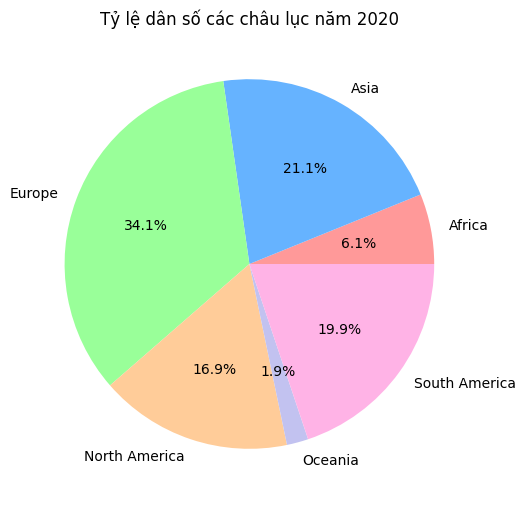

In [22]:
# Dữ liệu dân số các châu lục năm 2020 (từ file gmp-continents.csv)
population_data = {
    'Africa': 134394419,
    'Asia': 462485090,
    'Europe': 747625403,
    'North America': 369135478,
    'Oceania': 41244138,
    'South America': 434752997
}

# Tạo danh sách tên châu lục và dân số tương ứng
continent_names = list(population_data.keys())
continent_population = list(population_data.values())

# Màu sắc cho các miền đất
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Vẽ đồ thị pie-chart
plt.figure(figsize=(8, 6))
plt.pie(continent_population, labels=continent_names, colors=colors, autopct='%1.1f%%')
plt.title('Tỷ lệ dân số các châu lục năm 2020')

# Hiển thị đồ thị
plt.show()

### Câu 3: (2 điểm)

a, (1 điểm) Vẽ đồ thị histogram dân số các nước năm 2000

b, (1 điểm) Vẽ đồ thị boxplot dân số các nước từ năm 2000 - 2020

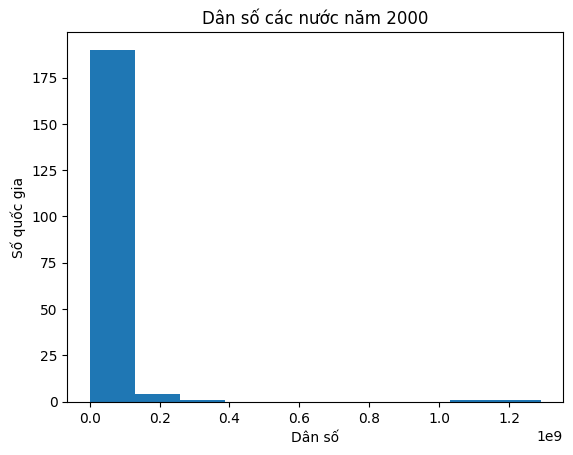

In [23]:
# Câu a: Vẽ đồ thị histogram dân số các nước năm 2000

# Lấy cột dân số năm 2000
population_2000 = df_countries['2000']

# Vẽ đồ thị histogram
plt.hist(population_2000, bins=10)

# Đặt tiêu đề và nhãn cho đồ thị
plt.title('Dân số các nước năm 2000')
plt.xlabel('Dân số')
plt.ylabel('Số quốc gia')

# Hiển thị đồ thị
plt.show()

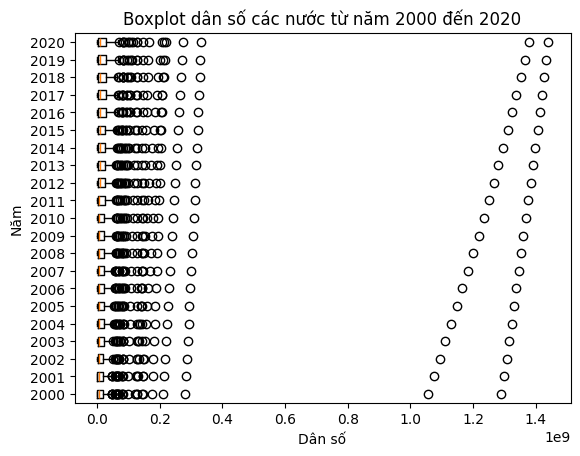

In [16]:
# b) Vẽ đồ thị boxplot dân số các nước từ năm 2000 - 2020

# Lấy dữ liệu dân số từ năm 2000 đến 2020
population_data = df_countries.loc[:, '2000':'2020']

# Vẽ đồ thị boxplot
plt.boxplot(population_data.values, labels=population_data.columns, vert=False)
plt.xlabel('Dân số')
plt.ylabel('Năm')
plt.title('Boxplot dân số các nước từ năm 2000 đến 2020')

# Hiển thị đồ thị
plt.show()

### Câu 4: (2 điểm)

a, (1.5 điểm) Vẽ biểu đồ tăng trưởng về dân số của 10 quốc gia Đông Nam Á. 

b, (0.5 điểm) Dựa vào hình vẽ bạn hãy cho biết quốc gia nào có tốc độ tăng trưởng nhanh nhất?

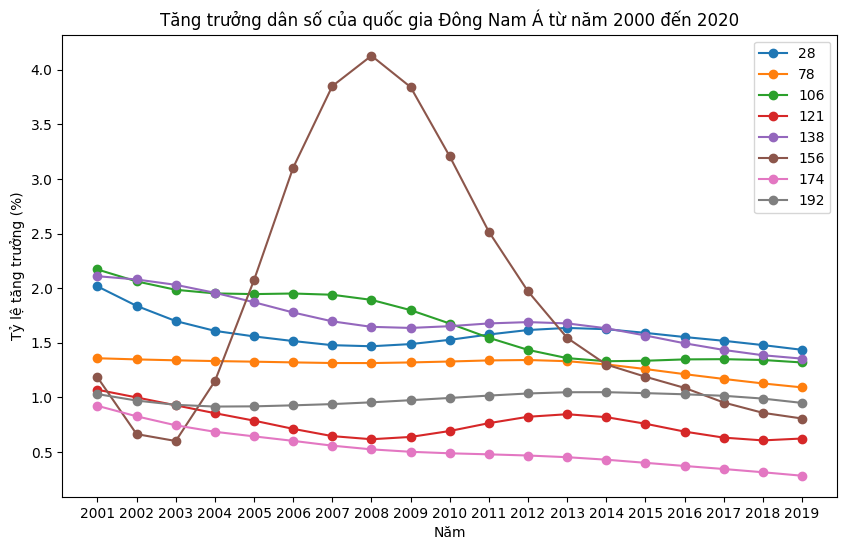

In [34]:
# a) Vẽ biểu đồ tăng trưởng về dân số của 10 quốc gia Đông Nam Á. 

# Chọn các quốc gia Đông Nam Á
southeast_asia_countries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia',
                            'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Lấy dữ liệu dân số của các quốc gia Đông Nam Á từ năm 2000 đến 2020
population_data = df_countries.loc[df_countries['name'].isin(southeast_asia_countries), '2000':'2020']

# Tính toán tăng trưởng dân số
population_growth = population_data.diff(axis=1) / population_data.iloc[:, :-1] * 100

# Vẽ biểu đồ tăng trưởng dân số
plt.figure(figsize=(10, 6))
for country in population_growth.index:
    plt.plot(population_growth.columns, population_growth.loc[country], marker='o', label=country)

plt.xlabel('Năm')
plt.ylabel('Tỷ lệ tăng trưởng (%)')
plt.title('Tăng trưởng dân số của quốc gia Đông Nam Á từ năm 2000 đến 2020')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [20]:
# b) Dựa vào hình vẽ bạn hãy cho biết quốc gia nào có tốc độ tăng trưởng nhanh nhất?

# Tìm quốc gia có tốc độ tăng trưởng nhanh nhất
fastest_growth_country = population_growth.mean().idxmax()
fastest_growth_rate = population_growth.mean().max()

print(f"Quốc gia có tốc độ tăng trưởng nhanh nhất là {fastest_growth_country} với tỷ lệ tăng trưởng trung bình {fastest_growth_rate:.2f}%.")

Quốc gia có tốc độ tăng trưởng nhanh nhất là 2008 với tỷ lệ tăng trưởng trung bình 1.57%.


In [32]:
# Tính trung bình tỷ lệ tăng trưởng dân số của mỗi quốc gia
average_growth = population_growth.mean(axis=1)

# Xác định quốc gia có tốc độ tăng trưởng nhanh nhất
fastest_country = average_growth.idxmax()

print("Quốc gia có tốc độ tăng trưởng nhanh nhất là:", fastest_country)

Quốc gia có tốc độ tăng trưởng nhanh nhất là: 156


In [ ]:
# b) Dựa vào hình vẽ bạn hãy cho biết quốc gia nào có tốc độ tăng trưởng nhanh nhất?


---